## **Aim : Image Filtering**

In the world of computer vision, image filtering is used to modify images. These modifications essentially allow you to clarify an image in order to get the information you want. This could involve anything from extracting edges from an image, blurring it, or removing unwanted objects. 

There are, of course, lots of reasons why you might want to use image filtering to modify an image. For example, taking a picture in sunlight or darkness will impact an images clarity – you can use image filters to modify the image to get what you want from it. Similarly, you might have a blurred or ‘noisy’ image that needs clarification and focus. Let’s use an example to see how to do image filtering in OpenCV.

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

### **Low-Pass Filtering (Blurring)**
The most basic of filtering operations is called "low-pass". A low-pass filter, also called a "blurring" or "smoothing" filter, averages out rapid changes in intensity. The simplest low-pass filter just calculates the average of a pixel and all of its eight immediate neighbors. The result replaces the original value of the pixel. The process is repeated for every pixel in the image.

This low-pass filtered image looks a lot blurrier. But why would you want a blurrier image? Often images can be noisy – no matter how good the camera is, it always adds an amount of ”snow” into the image. The statistical nature of light itself also contributes noise into the image.

Noise always changes rapidly from pixel to pixel because each pixel generates its own independent noise. The image from the telescope isn't "uncorrelated" in this fashion because real images are spread over many pixels. So the low-pass filter affects the noise more than it does the image. By suppressing the noise, gradual changes can be seen that were invisible before. Therefore a low-pass filter can sometimes be used to bring out faint details that were smothered by noise.

 

+1/9 +1/9 +1/9

+1/9 +1/9 +1/9

+1/9 +1/9 +1/9



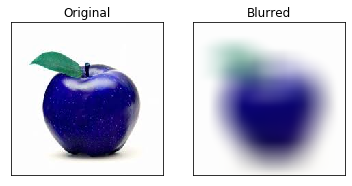

In [2]:
img = cv2.imread('index.jpeg')

blur = cv2.blur(img,(50,50))

plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(blur),plt.title('Blurred')
plt.xticks([]), plt.yticks([])
plt.show()



## **Median Filter**

A median filter is a nonlinear filter used for signal smoothing. It is particularly good for removing impulsive type noise from a signal. There are a number of variations of this filter, and a two-dimensional variant is often used in DSP systems to remove noise and speckles from images.



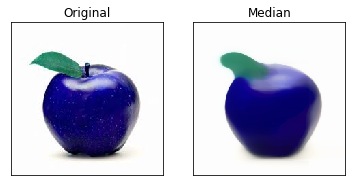

In [3]:

median = cv2.medianBlur(img,25)
plt.clf()
plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(median),plt.title('Median')
plt.xticks([]), plt.yticks([])
plt.show()

### **Histogram equalization**
Histogram equalization is a method in image processing of contrast adjustment using the image’s histogram.

This method usually increases the global contrast of many images, especially when the usable data of the image is represented by close contrast values. Through this adjustment, the intensities can be better distributed on the histogram. This allows for areas of lower local contrast to gain a higher contrast. Histogram equalization accomplishes this by effectively spreading out the most frequent intensity values. The method is useful in images with backgrounds and foregrounds that are both bright or both dark.

OpenCV has a function to do this, cv2.equalizeHist(). Its input is just grayscale image and output is our histogram equalized image.

In [4]:
img = cv2.imread('index.jpeg',0)
equ = cv2.equalizeHist(img)

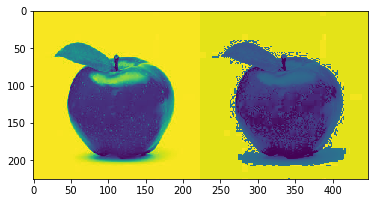

In [5]:

res = np.hstack((img,equ)) #stacking images side-by-side
plt.imshow(res)

## **High-pass filters**
OpenCV provides three types of gradient filters or High-pass filters, Sobel, Scharr and Laplacian. We will see each one of them.

1. Sobel and Scharr Derivatives
Sobel operators is a joint Gausssian smoothing plus differentiation operation, so it is more resistant to noise. You can specify the direction of derivatives to be taken, vertical or horizontal (by the arguments, yorder and xorder respectively). You can also specify the size of kernel by the argument ksize. If ksize = -1, a 3x3 Scharr filter is used which gives better results than 3x3 Sobel filter. Please see the docs for kernels used.

2. Laplacian Derivatives
It calculates the Laplacian of the image given by the relation, Δsrc=∂2src∂x2+∂2src∂y2 where each derivative is found using Sobel derivatives. If ksize = 1, then following kernel is used for filtering:

kernel=[0  1  0
        1 −4  1
        0  1  0 ]
Code
Below code shows all operators in a single diagram. All kernels are of 5x5 size. Depth of output image is passed -1 to get the result in np.uint8 type

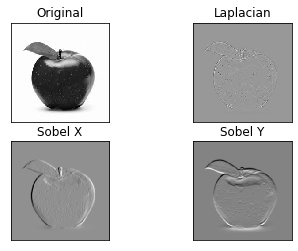

In [6]:

img = cv2.imread('index.jpeg',0)

laplacian = cv2.Laplacian(img,cv2.CV_64F)
sobelx = cv2.Sobel(img,cv2.CV_64F,1,0,ksize=5)
sobely = cv2.Sobel(img,cv2.CV_64F,0,1,ksize=5)
plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian,cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx,cmap = 'gray')
plt.title('Sobel X'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely,cmap = 'gray')
plt.title('Sobel Y'), plt.xticks([]), plt.yticks([])
plt.show()